<h1 style="text-align:center;font-size:30px;" > Quora Question Pairs </h1>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p>Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.</p>
<p>
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.
</p>
<br>
> Credits: Kaggle 

__ Problem Statement __
- Identify which questions asked on Quora are duplicates of questions that have already been asked. 
- This could be useful to instantly provide answers to questions that have already been answered. 
- We are tasked with predicting whether a pair of questions are duplicates or not. 

<h2> 1.2 Sources/Useful Links</h2>

- Source : https://www.kaggle.com/c/quora-question-pairs
<br><br>____ Useful Links ____
- Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
- Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
- Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
- Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30

<h2>1.3 Real world/Business Objectives and Constraints </h2>

1. The cost of a mis-classification can be very high.
2. You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
3. No strict latency concerns.
4. Interpretability is partially important.

<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> 
- Data will be in a file Train.csv <br>
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate <br>
- Size of Train.csv - 60MB <br>
- Number of rows in Train.csv = 404,290
</p>

<h3> 2.1.2 Example Data point </h3>

<pre>
"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
</pre>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not. </p>

<h3> 2.2.2 Performance Metric </h3>

Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s): 
* log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
* Binary Confusion Matrix

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with. </p>

<h1>3. Exploratory Data Analysis </h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools

from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
import spacy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h2> 3.1 Reading data and basic stats </h2>

In [3]:
df= pd.read_csv("train.csv")
print("the shape of the data is :",df.shape)

the shape of the data is : (404290, 6)


In [4]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


We are given a minimal number of data fields here, consisting of:

- id:  Looks like a simple rowID
- qid{1, 2}:  The unique ID of each question in the pair
- question{1, 2}:  The actual textual contents of the questions.
- is_duplicate:  The label that we are trying to predict - whether the two questions are duplicates of each other.

<h3> 3.2.1 Distribution of data points among output classes</h3>
- Number of duplicate(smilar) and non-duplicate(non similar) questions

Text(0,0.5,'Number of data points')

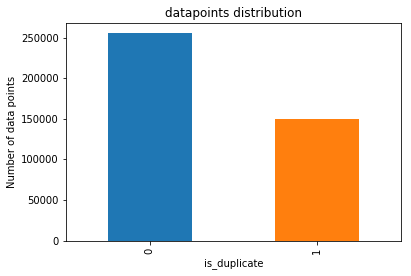

In [6]:
df.groupby("is_duplicate")['id'].count().plot.bar()
plt.title("datapoints distribution")
plt.ylabel("Number of data points")


### observations
    1. We find that the data is imbalanced.
    2. The duplicate questions are slightly less compared to non duplicate questions

In [7]:
print('~> Question pairs are not Similar (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\n~> Question pairs are Similar (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

~> Question pairs are not Similar (is_duplicate = 0):
   63.08%

~> Question pairs are Similar (is_duplicate = 1):
   36.92%


<h3> 3.2.2 Number of unique questions </h3>

In [8]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



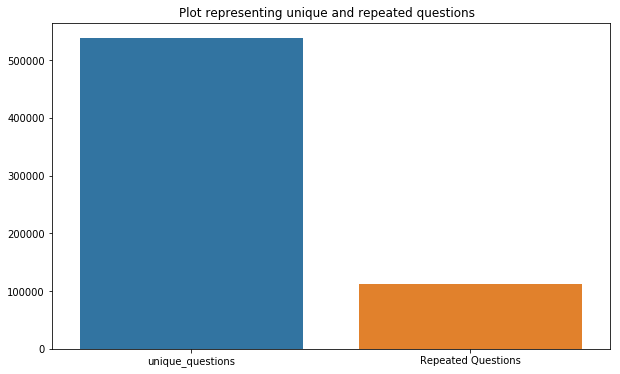

In [9]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

### observations
    1. There are very few repeated questions in the entire data

<h3>3.2.3 Checking for Duplicates </h3>

In [10]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
print(pair_duplicates.shape)
print ("Number of duplicate questions",pair_duplicates.shape[0] - df.shape[0])

(404290, 3)
Number of duplicate questions 0


<h3> 3.2.4 Number of occurrences of each question </h3>

Maximum number of times a single question is repeated: 157



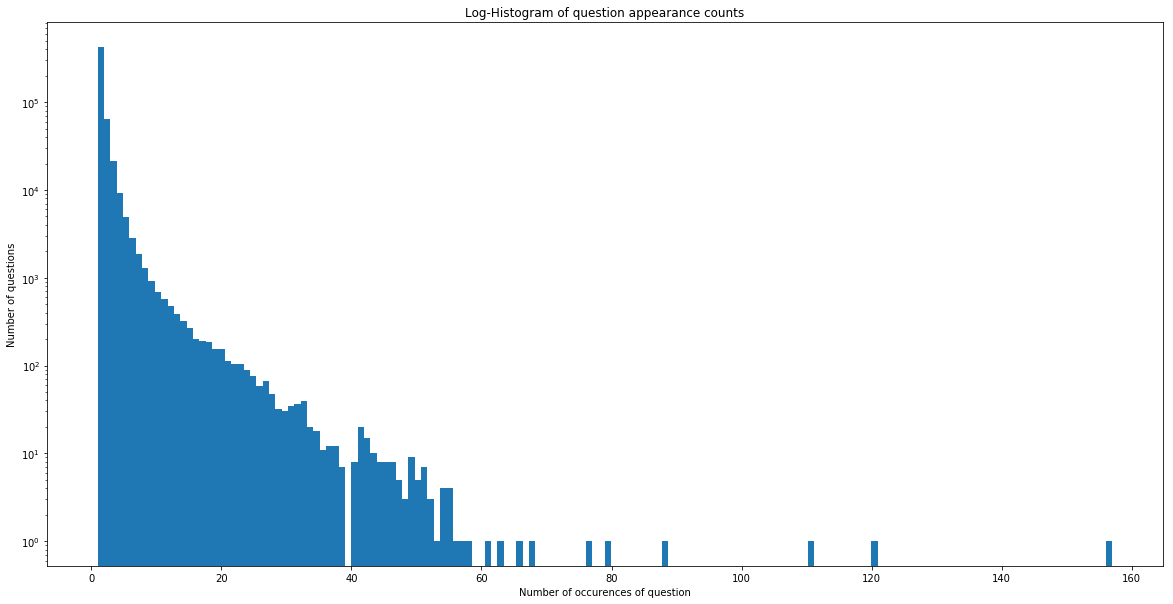

In [11]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

### observations
    1. Majority of the questions don't repeat more than 40 times.

In [12]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


In [13]:
# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


<h2>3.3 Basic Feature Extraction (before cleaning) </h2>

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

In [14]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
    df.head(5)
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  freq_qid1  \
0  What is the step by step guide to invest in sh...             0          1   
1  What would happen if the Indian government sto...             0          4   
2  How can Internet speed be increased by hacking...             0          1   
3  Find the remainder when [math]23^{24}[/math] i...             0          1   
4            Which fish would survive in salt water?             0          3   

   freq_qid2  q1len  q2len  q1_n_words  q2_n_words  word_Common  word_Total  \
0          1     66     57          14          12         10.0        23.0   
1          1     51     88           8          13          4.0        20.0   
2          1     73     59          14          10          4.0        24.0   
3          1     50     65          11           9          0.0        19.0   
4          1     76     39          13           7          2.0        20.0   

   word_share  freq_q1+q2  freq_q1-q2  
0    0.434783           2           0  
1    0.200000           5           3  
2    0.166667           2           0  
3    0.000000           2           0  
4    0.100000           4           2

<h3> 3.3.1 Analysis of some of the extracted features </h3>

- Here are some questions have only one single words.

In [15]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 67
Number of Questions with minimum length [question2] : 24


<h4> 3.3.1.1 Feature: word_share </h4>

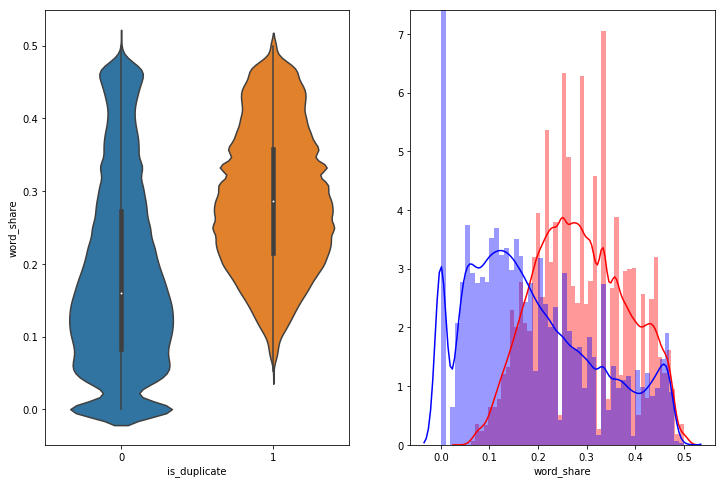

In [16]:
plt.figure(figsize=(12, 8))
import warnings
warnings.filterwarnings("ignore")
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()

### observations
    1. The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a 
       lot of  questions with high word similarity
    2. The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

<h4> 3.3.1.2 Feature: word_Common </h4>

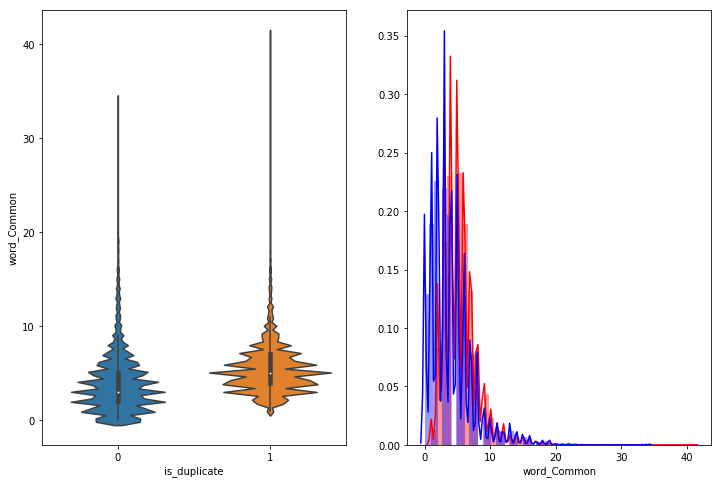

In [17]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' )
plt.show()

### observations
    1. We Can't find any distinct separations here.

## Pair plot

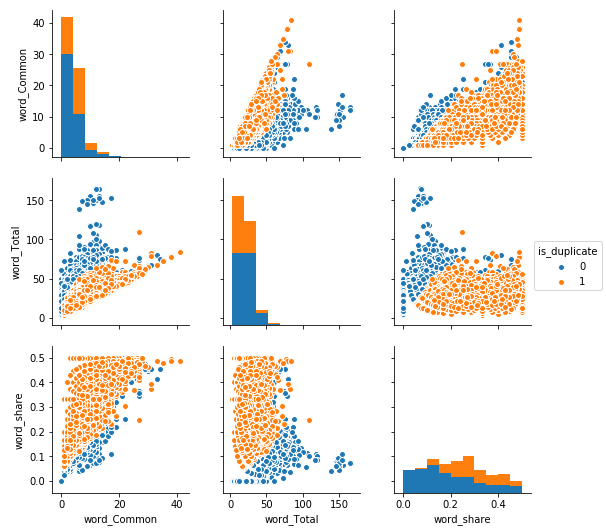

In [20]:
n = df.shape[0]
sns.pairplot(df[['word_Common', 'word_Total', 'word_share','is_duplicate']][0:n], hue='is_duplicate', vars=['word_Common', 'word_Total', 'word_share'])
plt.show()

### observations
    1. While doing pair plot features, we find that several pairs give us distinguishable plots.
    2. They are somewhat sepearable.

<h2> 3.4 Preprocessing of Text </h2>

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [42]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

<h2> 3.5 Advanced Feature Extraction (NLP and Fuzzy Features) </h2>

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if last word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ :  Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ :  Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>

- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [43]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [45]:
if os.path.isfile('nlp_features_train.csv'):
    df = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("train.csv")
    df = extract_features(df)
    df.to_csv("nlp_features_train.csv", index=False)
df.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   

                                           question2  is_duplicate   cwc_min  \
0  what is the step by step guide to invest in sh...             0  0.999980   
1  what would happen if the indian government sto...             0  0.799984   

    cwc_max   csc_min   csc_max          ...            ctc_max  last_word_eq  \
0  0.833319  0.999983  0.999983          ...           0.785709           0.0   
1  0.399996  0.749981  0.599988          ...           0.466664           0.0   

   first_word_eq  abs_len_diff  mean_len  token_set_ratio  token_sort_ratio  \
0            1.0           2.0      13.0              100                93   
1            1.0           5.0      12.5               86                63   

   fuzz_ratio  fuzz_partial_ratio  longest_substr_ratio  
0          93                 100              0.982759  
1          66                  75              0.596154  

[2 rows x 21 columns]

<h3>3.5.1 Analysis of extracted features </h3>

<h4> 3.5.1.1 Plotting Word clouds</h4>

- Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
- We can observe the most frequent occuring words

In [53]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s',encoding='utf-8')
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s',encoding='utf-8')

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [54]:
# reading the text files and removing the Stop Words:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt')).read()
textn_w = open(path.join(d, 'train_n.txt')).read()
#textp_w=p
#textn_w=n
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16110303
Total number of words in non duplicate pair questions : 33194892


__ Word Clouds generated from  duplicate pair question's text __

Word Cloud for Duplicate Question pairs


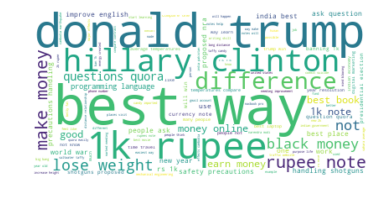

In [55]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### observations
    1. For duplicate pairs,words like donald trump,hillary clinton appear a lot.

__ Word Clouds generated from non duplicate pair question's text __

Word Cloud for non-Duplicate Question pairs:


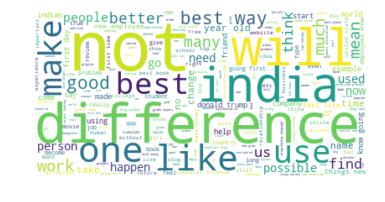

In [56]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### observations
    1. For non duplicate questions, words like not, difference and will appear a lot.

<h4> 3.5.1.2 Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] </h4>

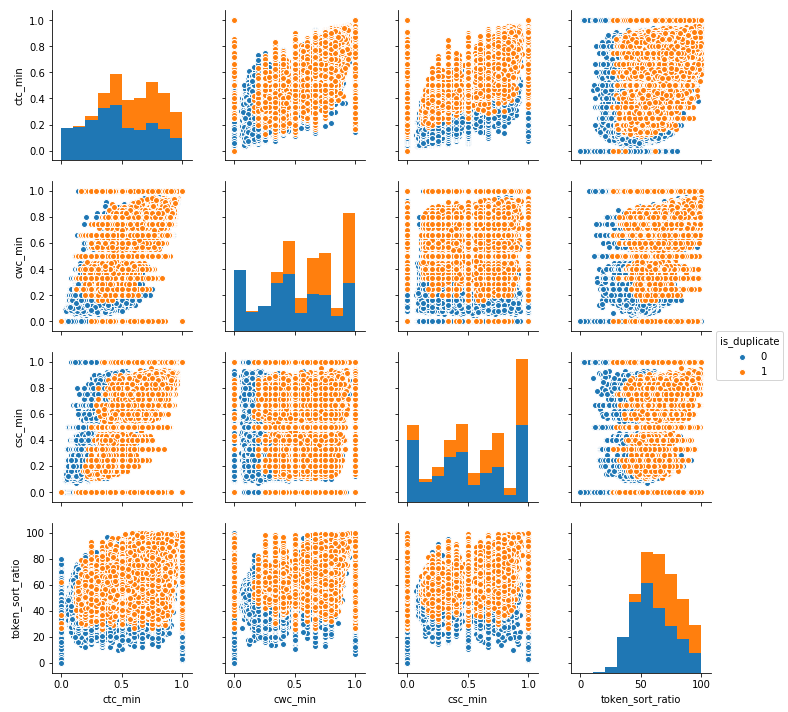

In [57]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

### observations
    1. While doing pair plot features, we find that several pairs give us distinguishable plots.
    2. Features like csc_min and cwc_min separate class 1 and class 2 and similarly many other features.

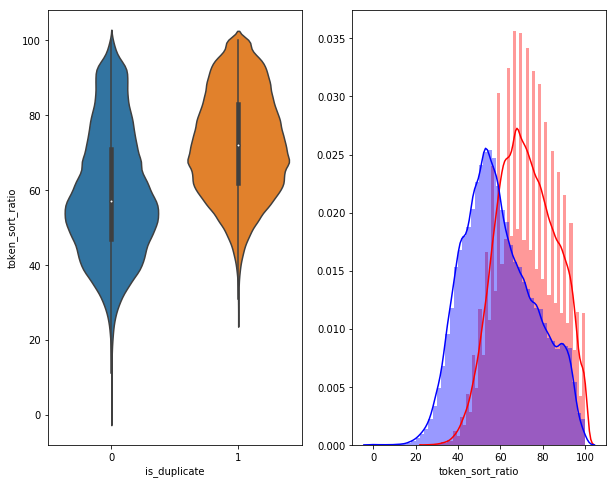

In [58]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

### observations
    1. We find that the token sort ratio is also a very helpful feature.

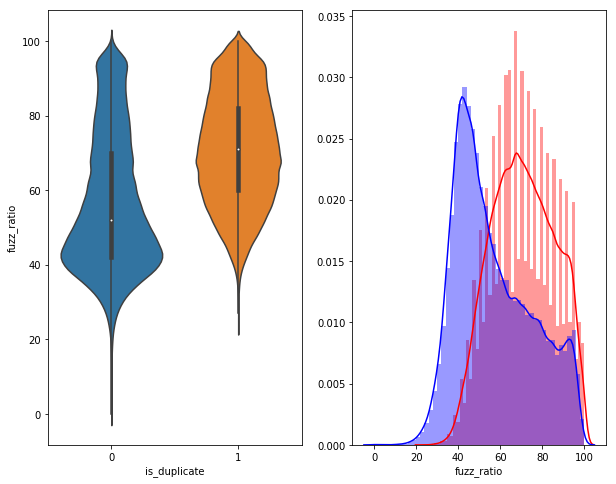

In [59]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

### observations
    1. We find that that the fuzz features are also helpful.

<h3>3.5.2 Visualization </h3>

In [60]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

In [61]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.062s...
[t-SNE] Computed neighbors for 5000 samples in 0.666s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.116557
[t-SNE] Computed conditional probabilities in 0.332s
[t-SNE] Iteration 50: error = 80.9162369, gradient norm = 0.0427600 (50 iterations in 4.093s)
[t-SNE] Iteration 100: error = 70.3915100, gradient norm = 0.0108003 (50 iterations in 2.875s)
[t-SNE] Iteration 150: error = 68.6126938, gradient norm = 0.0054721 (50 iterations in 2.959s)
[t-SNE] Iteration 200: error = 67.7680206, gradient norm = 0.0042246 (50 iterations in 4.023s)
[t-SNE] Iteration 250: error = 67.2733459, gradient norm = 0.0037275

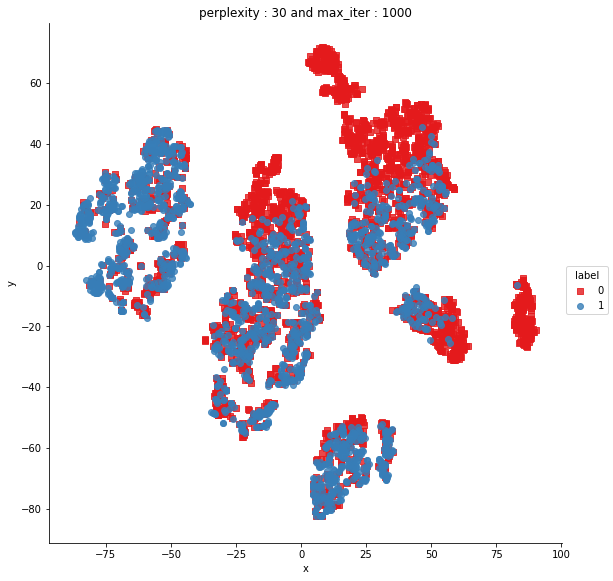

In [62]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

### observations
    1. We've plotted TSNE on a graph using 2 dimesions.
    2. We find that the data is separable to some extent.

In [63]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.016s...
[t-SNE] Computed neighbors for 5000 samples in 0.554s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.116557
[t-SNE] Computed conditional probabilities in 0.300s
[t-SNE] Iteration 50: error = 80.3552017, gradient norm = 0.0329941 (50 iterations in 13.169s)
[t-SNE] Iteration 100: error = 69.1100388, gradient norm = 0.0034323 (50 iterations in 7.722s)
[t-SNE] Iteration 150: error = 67.6163483, gradient norm = 0.0017810 (50 iterations in 6.586s)
[t-SNE] Iteration 200: error = 67.0578613, gradient norm = 0.0011246 (50 iterations in 6.778s)
[t-SNE] Iteration 250: error = 66.7297821, gradient norm = 0.000927

In [64]:
trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

### observations
    1. We've plotted tsne for 3 dimensions.
    2. We find that the plot is more seperable to some extent.
    3. This is a good indication that our data can be separated using techniques

<h2> 3.6 Featurizing text data with tfidf vectors </h2>

In [3]:
# avoid decoding problems
df = pd.read_csv("train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))
df["question1"] = df["question1"].fillna("")
df["question2"] = df["question2"].fillna("")

In [4]:
def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x

In [5]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    prahse = re.sub(r",000,000", "m", phrase)
    phrase = re.sub(r",000", "k", phrase)
    phrase = re.sub(r"\′", "'", phrase)
    phrase = re.sub(r"\’", "'", phrase)
    
    phrase =re.sub(r"what\'s", "what is", phrase)
    phrase =re.sub(r"it\'s", "it is", phrase)
    phrase = re.sub(r"i\'m", "i am", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"he\'s", "he is", phrase)
    phrase = re.sub(r"she\'s", "she is", phrase)
    phrase = re.sub(r"\'s", " own", phrase)
    phrase = re.sub(r"%", " percent ", phrase)
    phrase = re.sub(r"₹", " rupee ", phrase)
    phrase = re.sub(r"$", " dollar ", phrase)
    phrase = re.sub(r"€", " euro ", phrase)
    phrase = re.sub("\'ll", " will", phrase)
    phrase = re.sub(r"([0-9]+)000000", r"\1m", phrase)
    phrase = re.sub(r"([0-9]+)000", r"\1k", phrase)
    return phrase

In [6]:
def preprocessing(x,y):
    from tqdm import tqdm
    import math
    from collections import Counter
    preprocessed_essays = []
    my_count = Counter()
    a=[]
    # tqdm is for printing the status bar
    for sentance in tqdm(x[y].values):
        if sentance!=0:
            sentance = str(sentance).lower()
            sent = decontracted(sentance)
            sent = sent.replace('\\r', ' ')
            sent = sent.replace('\\"', ' ')
            sent = sent.replace('\\n', ' ')
            sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
            # https://gist.github.com/sebleier/554280
            porter = PorterStemmer()
            pattern = re.compile('\W')
    
            if type(sent) == type(''):
                x = re.sub(pattern, ' ', sent)
    
    
            if type(sent) == type(''):
                sent = porter.stem(sent)
                sent = BeautifulSoup(sent)
                sent = sent.get_text()
            #sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
            preprocessed_essays.append(sent.lower().strip())
        else:
            preprocessed_essays.append(0)
    return preprocessed_essays

In [7]:
question1=preprocessing(df,"question1")

100%|█████████████████████████████████████████████████████████████████████████| 404290/404290 [11:17<00:00, 596.62it/s]


In [8]:
question1[1:5]

['what is the story of kohinoor koh i noor diamond dollar',
 'how can i increase the speed of my internet connection while using a vpn dollar',
 'why am i mentally very lonely how can i solve it dollar',
 'which one dissolve in water quikly sugar salt methane and carbon di oxide dollar']

In [9]:
question2=preprocessing(df,"question2")

100%|█████████████████████████████████████████████████████████████████████████| 404290/404290 [12:53<00:00, 522.85it/s]


In [10]:
question2[1:5]

['what would happen if the indian government stole the kohinoor koh i noor diamond back dollar',
 'how can internet speed be increased by hacking through dns dollar',
 'find the remainder when math 23 24 math is divided by 24 23 dollar',
 'which fish would survive in salt water dollar']

In [11]:

df11=pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
df21=pd.read_csv("nlp_features_train.csv",encoding='latin-1')
y=df11["is_duplicate"]
df1 = df11.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df2 = df21.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)


In [12]:
# dataframe of nlp features
print(df1.shape)
df1.head()

(404290, 12)


id  freq_qid1  freq_qid2  q1len  q2len  q1_n_words  q2_n_words  \
0   0          1          1     66     57          14          12   
1   1          4          1     51     88           8          13   
2   2          1          1     73     59          14          10   
3   3          1          1     50     65          11           9   
4   4          3          1     76     39          13           7   

   word_Common  word_Total  word_share  freq_q1+q2  freq_q1-q2  
0         10.0        23.0    0.434783           2           0  
1          4.0        20.0    0.200000           5           3  
2          4.0        24.0    0.166667           2           0  
3          0.0        19.0    0.000000           2           0  
4          2.0        20.0    0.100000           4           2

In [13]:
# data before preprocessing 
print(df2.shape)
df2.head()

(404290, 16)


id   cwc_min   cwc_max   csc_min   csc_max   ctc_min   ctc_max  \
0   0  0.999980  0.833319  0.999983  0.999983  0.916659  0.785709   
1   1  0.799984  0.399996  0.749981  0.599988  0.699993  0.466664   
2   2  0.399992  0.333328  0.399992  0.249997  0.399996  0.285712   
3   3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   4  0.399992  0.199998  0.999950  0.666644  0.571420  0.307690   

   last_word_eq  first_word_eq  abs_len_diff  mean_len  token_set_ratio  \
0           0.0            1.0           2.0      13.0              100   
1           0.0            1.0           5.0      12.5               86   
2           0.0            1.0           4.0      12.0               66   
3           0.0            0.0           2.0      12.0               36   
4           0.0            1.0           6.0      10.0               67   

   token_sort_ratio  fuzz_ratio  fuzz_partial_ratio  longest_substr_ratio  
0                93          93                 100              0.982759  
1                63          66                  75              0.596154  
2                66          54                  54              0.166667  
3                36          35                  40              0.039216  
4                47          46                  56              0.175000

In [14]:
# Questions 1 tfidf weighted word2vec
df3= df1.merge(df2, on="id",how="left")

In [15]:
df3["question1"]=question1
df3["question2"]=question2
print(df3.shape)
df3.head()

(404290, 29)


id  freq_qid1  freq_qid2  q1len  q2len  q1_n_words  q2_n_words  \
0   0          1          1     66     57          14          12   
1   1          4          1     51     88           8          13   
2   2          1          1     73     59          14          10   
3   3          1          1     50     65          11           9   
4   4          3          1     76     39          13           7   

   word_Common  word_Total  word_share  \
0         10.0        23.0    0.434783   
1          4.0        20.0    0.200000   
2          4.0        24.0    0.166667   
3          0.0        19.0    0.000000   
4          2.0        20.0    0.100000   

                         ...                          first_word_eq  \
0                        ...                                    1.0   
1                        ...                                    1.0   
2                        ...                                    1.0   
3                        ...                                    0.0   
4                        ...                                    1.0   

   abs_len_diff  mean_len  token_set_ratio  token_sort_ratio  fuzz_ratio  \
0           2.0      13.0              100                93          93   
1           5.0      12.5               86                63          66   
2           4.0      12.0               66                66          54   
3           2.0      12.0               36                36          35   
4           6.0      10.0               67                47          46   

   fuzz_partial_ratio  longest_substr_ratio  \
0                 100              0.982759   
1                  75              0.596154   
2                  54              0.166667   
3                  40              0.039216   
4                  56              0.175000   

                                           question1  \
0  what is the step by step guide to invest in sh...   
1  what is the story of kohinoor koh i noor diamo...   
2  how can i increase the speed of my internet co...   
3  why am i mentally very lonely how can i solve ...   
4  which one dissolve in water quikly sugar salt ...   

                                           question2  
0  what is the step by step guide to invest in sh...  
1  what would happen if the indian government sto...  
2  how can internet speed be increased by hacking...  
3  find the remainder when math 23 24 math is div...  
4      which fish would survive in salt water dollar  

[5 rows x 29 columns]

## Splitting the data 

In [16]:
X_train1,X_test, y_train1, Y_test = train_test_split(df3, y, stratify=y, test_size=0.10)
X_train,X_cv, Y_train, Y_cv = train_test_split(X_train1, y_train1, stratify=y_train1, test_size=0.11111)


In [17]:
print("the shape of train data is {} and labels is {} ".format(X_train.shape,len(Y_train)))
print("the shape of cv data is {} and labels is {}".format(X_cv.shape,len(Y_cv)))
print("the shape of test data is {} and labels is {}".format(X_test.shape,len(Y_test)))

the shape of train data is (323432, 29) and labels is 323432 
the shape of cv data is (40429, 29) and labels is 40429
the shape of test data is (40429, 29) and labels is 40429


In [18]:
a=Y_train.mean()*100
print("the percentage of duplicates in train data is ",np.round(a,2),"%" )
b=Y_cv.mean()*100
print("the percentage of duplicates in CV data is ",np.round(b,2),"%" )
c=Y_test.mean()*100
print("the percentage of duplicates in test data is ",np.round(c,2),"%" )

the percentage of duplicates in train data is  36.92 %
the percentage of duplicates in CV data is  36.92 %
the percentage of duplicates in test data is  36.92 %


### Vectorizing the data

In [19]:
def data_modelling(x,z,u):#function for vectorizing numerical,categorical data along with essays and titles
    %matplotlib inline
    import warnings
    warnings.filterwarnings("ignore")

    import sqlite3
    import pandas as pd
    import numpy as np
    import nltk
    import string
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.feature_extraction.text import TfidfVectorizer

    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.metrics import confusion_matrix
    from sklearn import metrics
    from sklearn.metrics import roc_curve, auc
    from nltk.stem.porter import PorterStemmer

    import re
    # Tutorial about Python regular expressions: https://pymotw.com/2/re/
    import string
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from nltk.stem.wordnet import WordNetLemmatizer

    from gensim.models import Word2Vec
    from gensim.models import KeyedVectors
    import pickle

    from tqdm import tqdm
    import os

    from plotly import plotly
    import plotly.offline as offline
    import plotly.graph_objs as go
    offline.init_notebook_mode()
    from collections import Counter
    from tqdm import tqdm
    import string
    #project_essay
    #tfidf
    vectorizer = TfidfVectorizer(min_df=20)
    vectorizer.fit(x.question1)

    B1= vectorizer.transform(x.question1)
    B2=vectorizer.transform(z.question1)
    B3=vectorizer.transform(u.question1)

    vectorizerc = TfidfVectorizer(min_df=20)
    vectorizerc.fit(x.question2)
    
    A1= vectorizerc.transform(x.question2)
    A2= vectorizerc.transform(z.question2)
    A3= vectorizerc.transform(u.question2)
        
        
    print("All the features are encoded successfully and TF-IDF is used! ")
    #print("="*50)
    x=np.array(x.drop(['question1','question2'],axis=1))
    z=np.array(z.drop(['question1','question2'],axis=1))
    u=np.array(u.drop(['question1','question2'],axis=1))
    from scipy.sparse import hstack
    X_model= hstack((x,A1,B1))
    Y_model= hstack((z,A2,B2))
    Z_model= hstack((u,A3,B3))

    X_model= X_model.tocsr()
    Y_model= Y_model.tocsr()
    Z_model= Z_model.tocsr()

    return X_model,Y_model,Z_model


In [20]:
#emcoding data using data modelling function
x1_train, x1_test,x1_cv= data_modelling(X_train,X_test,X_cv)
print("The shape of training data after encoding: ",x1_train.shape , "Y_train: ", Y_train.shape)
print("The shape of testing data after encoding: ",x1_test.shape , "Y_test: ", Y_test.shape)
print("The shape of cross validation data after encoding: ",x1_cv.shape,"Y_cv: ",Y_cv.shape)

All the features are encoded successfully and TF-IDF is used! 
The shape of training data after encoding:  (323432, 17088) Y_train:  (323432,)
The shape of testing data after encoding:  (40429, 17088) Y_test:  (40429,)
The shape of cross validation data after encoding:  (40429, 17088) Y_cv:  (40429,)


<h1>4. Machine Learning Models </h1>

In [26]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8912039150055234


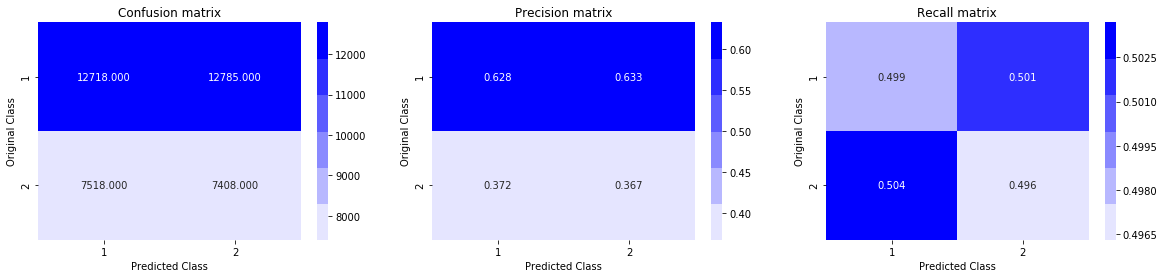

In [87]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((len(Y_test),2))
for i in range(len(Y_test)):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(Y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(Y_test, predicted_y)

### observations
    1. The log loss obtained is 0.89.
    2. If our ML models obtained worse results than this, then our models will not work.
    3. We've plotted confusion matrix, precision and recall matrix.

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [18:31<00:00, 101.47s/it]


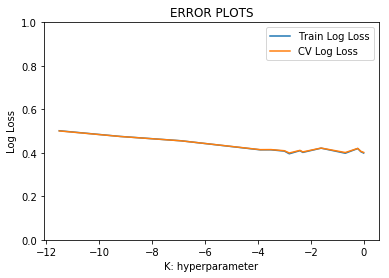

In [35]:
train_logloss = []
cv_logloss = []
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from matplotlib import pylab
from tqdm import tqdm
import math
import numpy as np
rain_auc = []
cv_auc = []
k2=[]
#k1 = np.arange(0,2,0.0001)
k1= [0.00001,0.0001,0.001,0.02,0.03,0.05,0.06,0.09,0.1,0.2,0.5,0.8,0.9,1]
for i in k1:
    k2.append(math.log(i))
for i in tqdm(k1):
    neigh = LogisticRegression(C=i,penalty="l2", class_weight= "balanced")
    neigh.fit(x1_train, Y_train)
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs
    predicted_labels = []
    for j in range(0, 323432, 1000):
        predicted_labels.extend(neigh.predict_proba(x1_train[j:j+1000])[:,1])
    
    #print(len(predicted_labels))
    predicted_labelss = []
    for k in range(0, 40429, 1000):
        predicted_labelss.extend(neigh.predict_proba(x1_cv[k:k+1000])[:,1])

    #y_train_pred =  neigh.predict_proba(x1_train)[:,1]
    #y_cv_pred =  neigh.predict_proba(x1_cv)[:,1]
    #print(len(predicted_labelss))
    train_logloss.append(log_loss(Y_train, predicted_labels, labels=neigh.classes_, eps=1e-15))
    cv_logloss.append(log_loss(Y_cv, predicted_labelss, labels=neigh.classes_, eps=1e-15))


plt.plot(k2, train_logloss, label='Train Log Loss')
pylab.ylim([0,1])

plt.plot(k2, cv_logloss, label='CV Log Loss')
pylab.ylim([0,1])

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("Log Loss")
plt.title("ERROR PLOTS")
plt.show()

### Observation:
    1. We've used to logistic regression for hyper parameter tuning.
    2. We find that the logloss is the least at alpha=0.01

For values of best alpha =  0.001 The train log loss is: 0.4318595310925645
For values of best alpha =  0.001 The test log loss is: 0.42763541976000197


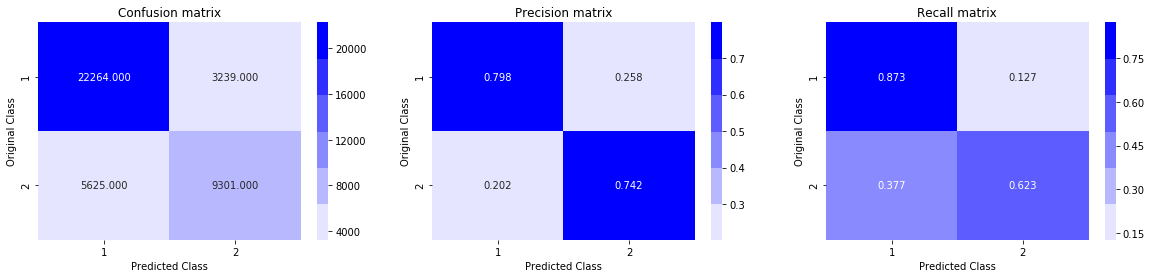

In [101]:
best_alpha = np.argmin(log_error_array)
clf = neigh = LogisticRegression(C=0.001,penalty="l2", class_weight= "balanced")
clf.fit(x1_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x1_train, Y_train)

predict_y = sig_clf.predict_proba(x1_train)
print('For values of best alpha = ', 0.001, "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x1_test)
print('For values of best alpha = ', 0.001, "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(Y_test, predicted_y)

### Observation:
    1. We find that the model performs decently well.
    2. The train log loss is 0.43 and test log loss is 0.42.
    3. The precision and recall for both classes are good.

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.6585234093433366
For values of alpha =  0.0001 The log loss is: 0.6585234093433366
For values of alpha =  0.001 The log loss is: 0.6585234093433366
For values of alpha =  0.01 The log loss is: 0.6585234093433366
For values of alpha =  0.1 The log loss is: 0.6130914513609544
For values of alpha =  1 The log loss is: 0.5817348948245881
For values of alpha =  10 The log loss is: 0.6509724871729835


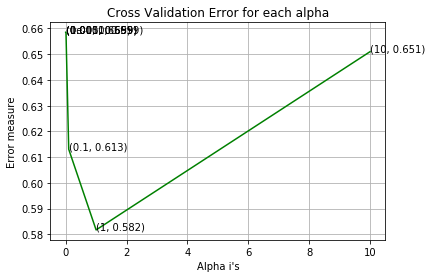

For values of best alpha =  1 The train log loss is: 0.5874751202547962
For values of best alpha =  1 The test log loss is: 0.5891213582047838
Total number of data points : 40429


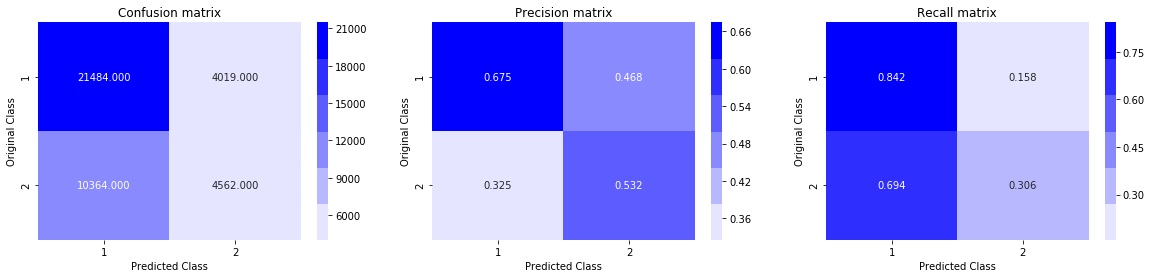

In [102]:
alpha = [10 ** x for x in range(-5, 2)]
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge',class_weight="balanced", random_state=42)
    clf.fit(x1_train, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x1_train, Y_train)
    predict_y = sig_clf.predict_proba(x1_test)
    log_error_array.append(log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(x1_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x1_train, Y_train)

predict_y = sig_clf.predict_proba(x1_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x1_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(Y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_test, predicted_y)

### Observations
    1. The model is obtained for linear svm.
    2. The model is not as good as previous models.
    3. The logistic regression performs better than this model.
    4. The precision and recall values obtained for class 2 are very low.

<h2> 4.6 XGBoost </h2>

### Hyperparameter Tuning

In [21]:
def SCV(x,y,x1,y1): #function for simple cross validation and calculation of auc for different alphas   
    from sklearn.metrics import roc_curve, auc
    from sklearn.linear_model import SGDClassifier
    from sklearn.metrics import roc_auc_score
    from matplotlib import pylab
    from tqdm import tqdm
    from sklearn.ensemble import RandomForestClassifier
    import xgboost as xgb
    #from sklearn.calibration import CalibratedClassifierCV 
    import math
    import numpy as np
    #x11_train=x
    #y11_train= y
    train = []
    cv = []

    #k1 = np.arange(0,2,0.0001)
    n_estimator= [12, 24, 36, 48,60,100,400]
    max_depths=[1,2,4,6,8]
    for i in tqdm(n_estimator):
        train_logloss = []
        cv_logloss = []
        for j in max_depths:
            neigh=xgb.XGBClassifier(max_depth=j, learning_rate=0.1, n_estimators=i,silent=True, objective='binary:logistic', booster='gbtree',early_stopping_round=20, n_jobs=-1, random_state=0)
            neigh.fit(x, y, verbose=False)
            #sig_clf = CalibratedClassifierCV(neigh, method="sigmoid")
            #sig_clf.fit(x1_train, Y_train)
            predicted_labels=[]
            predicted_labelss=[]
            for j in range(0, 343234, 1000):
                predicted_labels.extend(neigh.predict_proba(x[j:j+1000])[:,1])
            for m in range(0, 40429, 1000):
                predicted_labelss.extend(neigh.predict_proba(x1[m:m+1000])[:,1])
            train_logloss.append(log_loss(y, predicted_labels, labels=neigh.classes_, eps=1e-15))
            cv_logloss.append(log_loss(y1, predicted_labelss, labels=neigh.classes_, eps=1e-15))
        train.append(train_logloss)
        cv.append(cv_logloss)

    import numpy as np
    import pandas as pd
    train= np.array(train)
    cv= np.array(cv)
    train1= train.reshape(len(n_estimator), len(max_depths))
    #print(train1.shape)
    cv1= cv.reshape(len(n_estimator), len(max_depths))
    train2= pd.DataFrame(train1, index=n_estimator, columns= max_depths)
    train2=train2.reindex(index=train2.index[::-1])
    cv2= pd.DataFrame(cv1, index=n_estimator, columns= max_depths)
    cv2=cv2.reindex(index=cv2.index[::-1])
    #print(cv1.shape)
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.heatmap(train2, annot= True)
    plt.xlabel("Maximum depth")
    plt.ylabel("Number of estimators")
    plt.title("Logloss for Train Data")
    #plt.yticks(np.arange(len(n_estimator)), n_estimator)
    #plt.xticks(np.arange(len(max_depths)), max_depths)
    plt.subplot(1,2,2)
    #plt.yticks(np.arange(len(n_estimator)), n_estimator)
    #plt.xticks(np.arange(len(n_estimator)), max_depths)
    sns.heatmap(cv2, annot= True)
    plt.xlabel("Maximum depth")
    plt.ylabel("Number of estimators")
    plt.title("log loss for CV data")
    plt.suptitle("Simple cross validation to find optimal hyperparameters")
    plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 7/7 [2:32:59<00:00, 1996.72s/it]


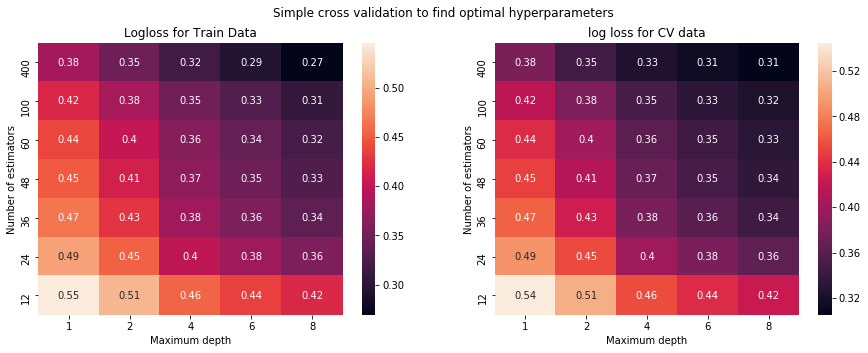

In [22]:
SCV(x1_train,Y_train,x1_cv,Y_cv)

#### Observations
    1. We've performed hyper parameter tuning with multi hyperparameters using for loop.
    2. For max_depth=6 and Max_estimators=400, We find the best train log loss at 0.29.

### Test Log Loss

In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from matplotlib import pylab
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
#from sklearn.calibration import CalibratedClassifierCV 
import math
import numpy as np

neigh=xgb.XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=400,silent=True, objective='binary:logistic', booster='gbtree',early_stopping_round=20, n_jobs=-1, random_state=0)
neigh.fit(x1_train, Y_train, verbose=False)

predicted_labels=[]
predicted_labelss=[]
for m in range(0, 40429, 1000):
    predicted_labelss.extend(neigh.predict_proba(x1_test[m:m+1000])[:,1])
print("The test log loss is given as: ",log_loss(Y_test, predicted_labelss, labels=neigh.classes_, eps=1e-15))


The test log loss is given as:  0.3126927725796484


### Confusion Matrix

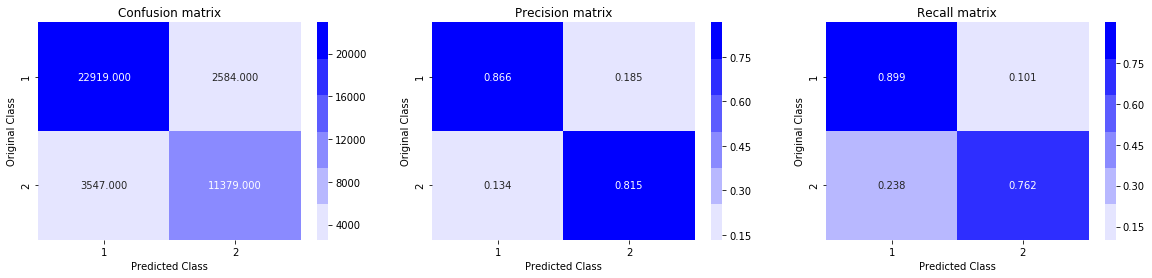

In [33]:
#predicted_labelss
predicted_labelss1=[]
for m in range(0, 40429, 1000):
    predicted_labelss1.extend(neigh.predict(x1_test[m:m+1000]))
plot_confusion_matrix(Y_test, predicted_labelss1)

### Observation
    1. The precision and recall matrix obtaained are the best values so far.
    2. The confusion obtained also has very less false positives and false negatives

## Summary

In [38]:
from prettytable import PrettyTable
#http://zetcode.com/python/prettytable/
    
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper parameter","Train Log Loss", "Test Log Loss"]

x.add_row(["TF-IDF", "Logistic Regression","alpha=0.01", 0.43, 0.42])
x.add_row(["TF-IDF", "XgBoost","Max_depth=6\n Max_estimators=400", 0.29, 0.31])
x.add_row(["TF-IDF", "Linear SVM","alpha=1", 0.58, 0.58])




print(x)

+------------+---------------------+---------------------+----------------+---------------+
| Vectorizer |        Model        |   Hyper parameter   | Train Log Loss | Test Log Loss |
+------------+---------------------+---------------------+----------------+---------------+
|   TF-IDF   | Logistic Regression |      alpha=0.01     |      0.43      |      0.42     |
|   TF-IDF   |       XgBoost       |     Max_depth=6     |      0.29      |      0.31     |
|            |                     |  Max_estimators=400 |                |               |
|   TF-IDF   |      Linear SVM     |       alpha=1       |      0.58      |      0.58     |
+------------+---------------------+---------------------+----------------+---------------+


## Conclusion
    1. We've analysed the quora question similarity case study.
    2. Intially we did EDA to understand our data and find patterns.
    3. We've performed EDA on features which contain duplicates and compared them with non duplicates.
    4. We did some simple feature extraction such as finding the common word share in row from the data and preprocessed it.
    5. Similarly We did advance feature extraction and found some very useful features.
    6. We plotted TSNE to find patterns again.
    7. Before vectorizing our data,We've split it into train, test and cv.
    8. We've used TF-IDF vectorizer to vectorize our data.
    9. We've used the models, logistic regression, SVM and XGboost.
    10.For logistic regression we tried simple cross validation to tune our hyper parameters and plotted its
       confusion matrix.
    11.Similarly, We did hyper paramter tuning for linear SVM and found its log loss
    12.We find that the sklearn XGboost works the best and gives us the least log loss.